In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_5',
                          'g_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_5',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_5',
                          'g_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_5',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 5 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 5

nref = 1

p_refs = (/ 500 /)

t_refs = (/ 250 /)

ng_refs = (/ 5 /)

data wgt
     &     /5 * 1/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

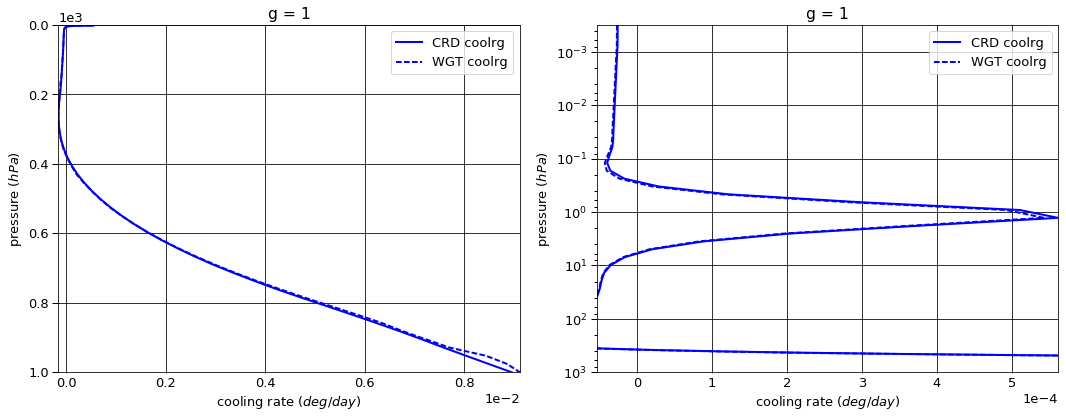

# Figure: cooling rate g-group 2

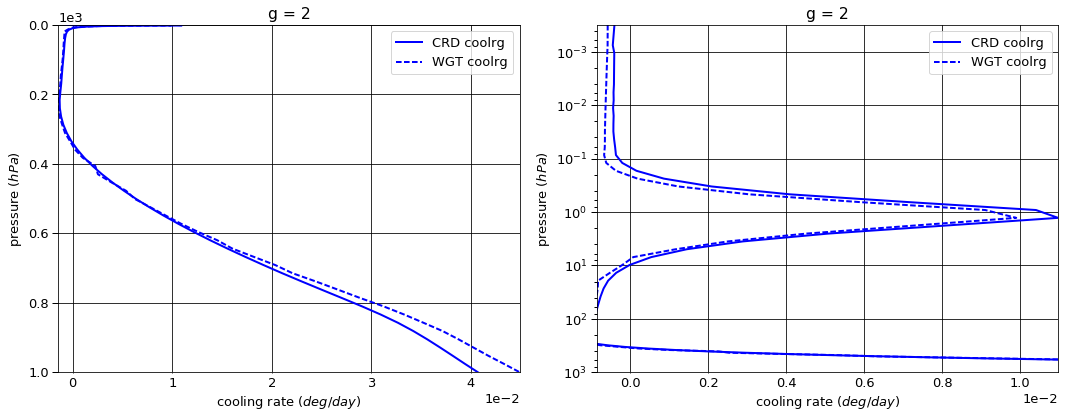

# Figure: cooling rate g-group 3

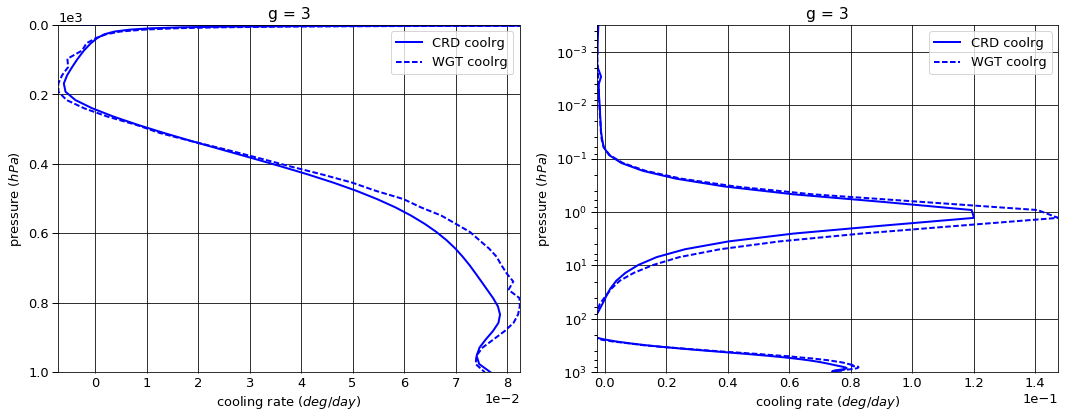

# Figure: cooling rate g-group 4

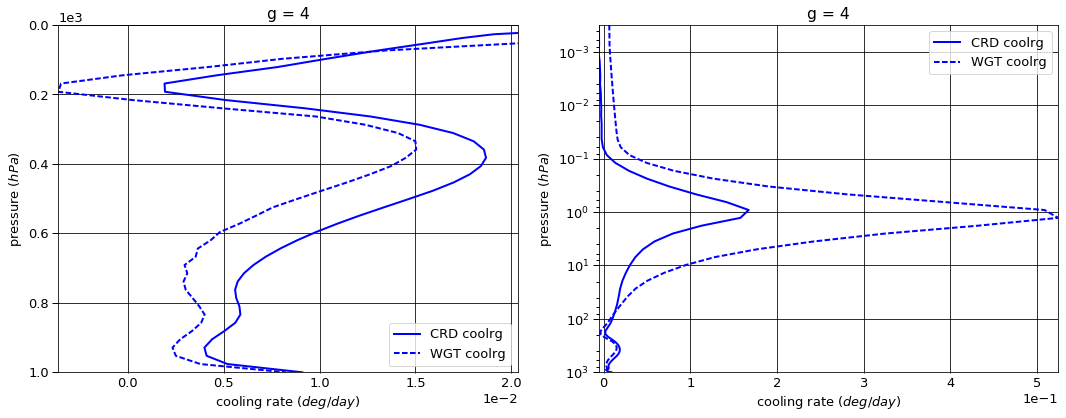

# Figure: cooling rate g-group 5

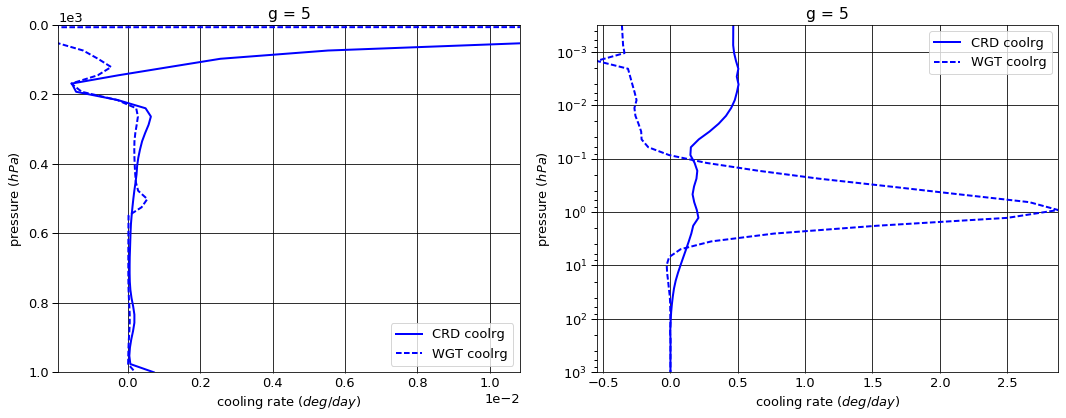

# Figure: cooling rate g-group total

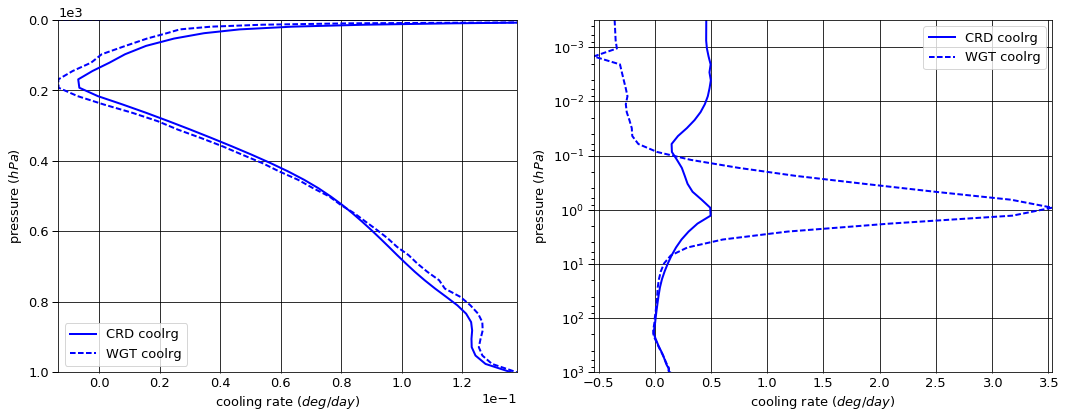

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                               
1 0.0      1      -9.328175  0.000000 -9.328175
  1013.0   76     -9.398259  0.338945 -9.059314
2 0.0      1      -7.804278  0.000000 -7.804278
  1013.0   76     -8.332402  2.018077 -6.314325
3 0.0      1      -7.183097  0.000000 -7.183097
  1013.0   76    -10.642894  8.636023 -2.006871
4 0.0      1      -1.328261  0.000000 -1.328261
  1013.0   76     -3.381209  3.328960 -0.052249
5 0.0      1      -0.335067  0.000000 -0.335067
  1013.0   76     -0.882778  0.880611 -0.002167


WGT


flug      fldg     fnetg
g pressure level                               
1 0.0      1      -9.327121  0.000000 -9.327121
  1013.0   76     -9.398259  0.344660 -9.053600
2 0.0      1      -7.775835  0.000000 -7.775835
  1013.0   76     -8.332402  2.148376 -6.184026
3 0.0      1      -6.883730  0.000000 -6.883730
  1013.0   76    -10.642894  9.206728 -1.436166
4 0.0      1      -1.204793  0.000000 -1.204793
  1013.0   76     -3.381209  3.343988 -0.037221
5 0.0      1      -0.549903  0.000000 -0.549903
  1013.0   76     -0.882778  0.882216 -0.000562


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.001054  0.000000  0.001054
  1013.0   76     0.000000  0.005715  0.005715
2 0.0      1      0.028443  0.000000  0.028443
  1013.0   76     0.000000  0.130299  0.130299
3 0.0      1      0.299367  0.000000  0.299367
  1013.0   76     0.000000  0.570705  0.570705
4 0.0      1      0.123468  0.000000  0.123468
  1013.0   76     0.000000  0.015028  0.015028
5 0.0      1     -0.214836  0.000000 -0.214836
  1013.0   76     0.000000  0.001605  0.001605

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000025
  1001.112500 75     0.008956
2 0.000312    1     -0.000409
  1001.112500 75     0.040701
3 0.000312    1     -0.002116
  1001.112500 75     0.076799
4 0.000312    1     -0.005378
  1001.112500 75     0.009101
5 0.000312    1      0.466469
  1001.112500 75     0.000718


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000026
  1001.112500 75     0.009117
2 0.000312    1     -0.000582
  1001.112500 75     0.044903
3 0.000312    1     -0.002592
  1001.112500 75     0.075669
4 0.000312    1      0.006507
  1001.112500 75     0.008239
5 0.000312    1     -0.360310
  1001.112500 75     0.000202


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -9.539760e-07
  1001.112500 75     1.609853e-04
2 0.000312    1     -1.729892e-04
  1001.112500 75     4.202573e-03
3 0.000312    1     -4.765415e-04
  1001.112500 75    -1.129721e-03
4 0.000312    1      1.188519e-02
  1001.112500 75    -8.612179e-04
5 0.000312    1     -8.267785e-01
  1001.112500 75    -5.159405e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.978879,0.000000,-25.978879
1013.0,76,-32.637543,15.202617,-17.434926



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-25.741383,0.000000,-25.741383
1013.0,76,-32.637543,15.925968,-16.711575



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.237496,0.000000,0.237496
1013.0,76,0.000000,0.723351,0.723351


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.458541
1001.112500,75,0.136275



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.357003
1001.112500,75,0.138131



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.815544
1001.112500,75,0.001857


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.295438,0.282348
2,0.257437,0.253497
3,0.319937,0.330799
4,0.101000,0.105619
5,0.026187,0.027737


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.959058e-25
2,3.450210e-24
3,4.022884e-23
4,4.690613e-22
5,5.469172e-21


In [21]:
def spreadsheet():
    ng = 5
    ng_refs = [5]
    p_refs = [500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.959058e-25,NaN,0.295438,0.282348,0.295438,0.282348,500.0
2,3.450210e-24,NaN,0.257437,0.253497,0.552875,0.535845,500.0
3,4.022884e-23,11.659825,0.319937,0.330799,0.872812,0.866644,500.0
4,4.690613e-22,11.659825,0.101000,0.105619,0.973812,0.972263,500.0
5,5.469172e-21,11.659825,0.026187,0.027737,1.000000,1.000000,500.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# Histogram of wavenumbers in g-group 1

In [24]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [25]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')